In [1]:
import shutil
import os
from tqdm.notebook import tqdm
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import torch
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

from torch.nn import MSELoss

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


torch.cuda.empty_cache()

from mpl_toolkits import mplot3d


In [2]:
d = 2
name_core = "\\SS\\Results\\d={0}\\".format(d)

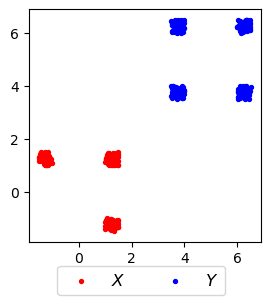

In [4]:
torch.manual_seed(1)
n = 256
Z = torch.rand([n, d]) - 0.5
sign_z = torch.sign(Z)
sigma_z = torch.all((sign_z == -1), dim=1)
X = Z[~sigma_z]
X = X + 1*torch.sign(X)

# Y = X + 5
Z1 = torch.rand([n, d]) - 0.5
Y = Z1 + 1*torch.sign(Z1) + 5
fig, axs = plt.subplots(1, 1, figsize=(3,3.6))
csfont = {'fontname': 'Times New Roman', 'fontweight':'bold', 'size': 16}
labels = ["$X$", "$Y$"]
axs.scatter(X.T[0], X.T[1], s =8, marker='o',facecolor='r', edgecolors='r', label="X")
axs.scatter(Y.T[0], Y.T[1], s =8, marker='o',facecolor='b', edgecolors='b', label="Y")
axs.set_box_aspect(1)
# axs.legend(fontsize=8)
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=12)

plt.savefig('fragemented Hypercube-d=2.png', dpi = 500, format='png')
plt.savefig('fragemented Hypercube-d=2.pdf', dpi = 500, format='pdf')
plt.savefig('fragemented Hypercube-d=2.svg', dpi=500, format='svg')

plt.show()


In [5]:
class AffineNet(nn.Module):
    def __init__(self, i_dim):
        super(AffineNet, self).__init__()
        self.A = nn.parameter.Parameter(
            torch.eye(i_dim, dtype=torch.float32, requires_grad=True))
        self.b = nn.parameter.Parameter(torch.zeros(
            [1, i_dim], dtype=torch.float32, requires_grad=True))

    def forward(self, Y):
        return torch.mm(Y, self.A) + self.b


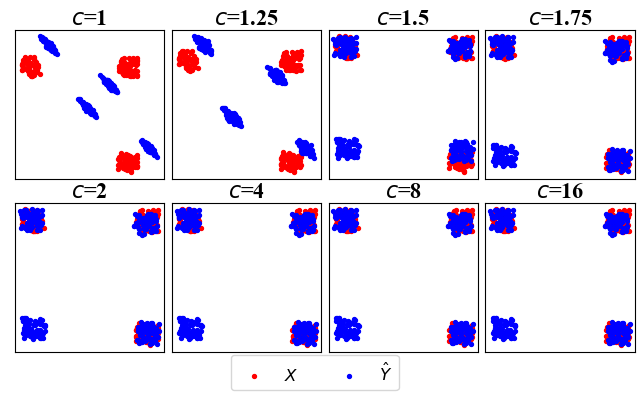

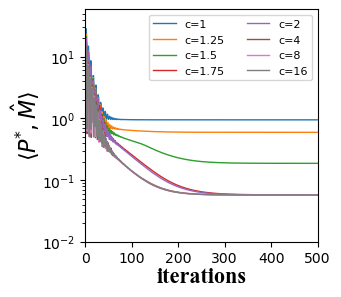

In [6]:
cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]


# fig, axs = plt.subplots(1, len(Lts), figsize=(12, 6))
# plt.subplots_adjust(hspace=0.20)
fig, axs = plt.subplots(2,4, figsize = (8,4.2))
img_row_idx, img_col_idx = np.unravel_index(np.array(range(0, len(cs))), (2,4))

# if len(axs.shape)==1:
#     axs = axs.reshape([1, len(axs)])

fig.subplots_adjust(hspace = .15, wspace=.05)

fig1, axs1 = plt.subplots(1, 1, figsize=(3, 3.4))
    
labels = ["$X$", "$\hat{Y}$"]
csfont = csfont = {'fontname': 'Times New Roman',
                   'fontweight': 'bold', 'size': 16}
n = 1
for k in range(len(cs)):
    c = cs[k]
    path = name_core + "d="+ str(d) + "c=" + str(c)+".pth"
    checkpoint = torch.load(path)
    AM = AffineNet(2)
    AM_infer = checkpoint['AM_infer']
    AM.load_state_dict(AM_infer)
    AM.eval()
    Yt = AM(Y).detach().cpu()
    
    i = img_row_idx[k]
    j = img_col_idx[k]
    

    axs[i,j].scatter(X[:, 0], X[:, 1], s = 8, marker='o',facecolor='r', edgecolors='r', label=labels[0])

    axs[i,j].scatter(Yt[:, 0], Yt[:, 1], s = 8, marker='o', facecolor='b', edgecolors='b', label=labels[1])
    axs[i,j].set_aspect('equal', 'box')
    axs[i, j].set_title("$c$="+str(c), **csfont, pad = 0)
    axs[i,j].tick_params(axis='both', which='major', labelsize=8)
    # axs[i,j].set_xticks([-2,-1,0,1,2])
    # axs[i,j].set_yticks([-2,-1,0,1,2])
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])
    axs[i,j].set_box_aspect(1)
    # axs[0,j].legend()
    
#     axs[1, j].semilogy(checkpoint["costs"], '-b', linewidth= 0.5)
#     axs[1, j].set_box_aspect(1)
#     axs[1, j].tick_params(axis='both', which='major', labelsize=6)
#     axs[1,j].set_yticks([1e-1, 1e0, 1e1])
    
    axs1.semilogy(checkpoint["costs"], '-', linewidth=1, label = "c="+str(c))
    axs1.set_box_aspect(1)
    axs1.tick_params(axis='both', which='major', labelsize=10)
    axs1.set_yticks([1e-2, 1e-1, 1e0, 1e1])
    axs1.set_xlim([0, 500])
    
    axs1.set_xlabel("iterations",**csfont, labelpad=1)
    axs1.set_ylabel("$\langle  \mathbf{\mathit{P}}^{*}, \hat{M}  \\rangle$", **csfont, labelpad=0)

axs1.legend(fontsize=8, ncol=2)
    
# fig.suptitle('Entropic Subset Selection')  # or plt.suptitle('Main title')
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure, loc = 'lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=12)

fig.savefig('fragemented Hypercube-SS-d=2.png', bbox_inches = 'tight', dpi = 500, format='png')
fig.savefig('fragemented Hypercube-SS-d=2.pdf', bbox_inches = 'tight', dpi = 500, format='pdf')
fig.savefig('fragemented Hypercube-SS-d=2.svg', bbox_inches = 'tight', dpi=500, format='svg')

fig1.savefig('fragemented Hypercube-SS-d=2-loss.png', bbox_inches = 'tight', dpi=500, format='png')
fig1.savefig('fragemented Hypercube-SS-d=2-loss.pdf', bbox_inches = 'tight', dpi=500, format='pdf')
fig1.savefig('fragemented Hypercube-SS-d=2-loss.svg', bbox_inches = 'tight', dpi=500, format='svg')


In [58]:
name_core = "\\SS-ipot\\Results\\d={0}\\".format(d)

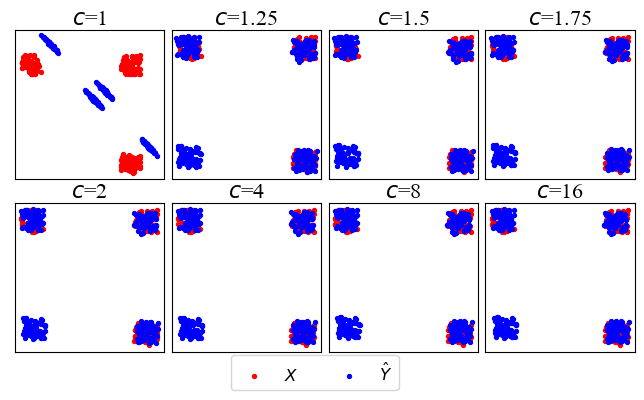

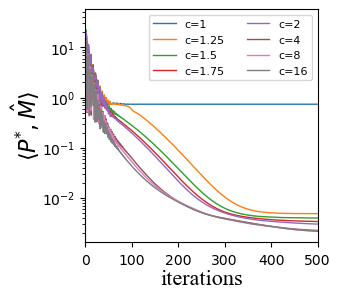

In [59]:
cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]


# fig, axs = plt.subplots(1, len(Lts), figsize=(12, 6))
# plt.subplots_adjust(hspace=0.20)
fig, axs = plt.subplots(2, 4, figsize=(8, 4.2))
img_row_idx, img_col_idx = np.unravel_index(
    np.array(range(0, len(cs))), (2, 4))

# if len(axs.shape)==1:
#     axs = axs.reshape([1, len(axs)])

fig.subplots_adjust(hspace=.15, wspace=.05)

fig1, axs1 = plt.subplots(1, 1, figsize=(3, 3.4))

labels = ["$X$", "$\hat{Y}$"]
csfont = {'fontname': 'Times New Roman', 'size': 16}
n = 1
for k in range(len(cs)):
    c = cs[k]
    path = name_core + "d=" + str(d) + "c=" + str(c)+".pth"
    checkpoint = torch.load(path)
    AM = AffineNet(2)
    AM_infer = checkpoint['AM_infer']
    AM.load_state_dict(AM_infer)
    AM.eval()
    Yt = AM(Y).detach().cpu()

    i = img_row_idx[k]
    j = img_col_idx[k]

    axs[i, j].scatter(X[:, 0], X[:, 1], s=8, marker='o',
                      facecolor='r', edgecolors='r', label=labels[0])

    axs[i, j].scatter(Yt[:, 0], Yt[:, 1], s=8, marker='o',
                      facecolor='b', edgecolors='b', label=labels[1])
    axs[i, j].set_aspect('equal', 'box')
    axs[i, j].set_title("$c$="+str(c), **csfont, pad=0)
    axs[i, j].tick_params(axis='both', which='major', labelsize=8)
    # axs[i,j].set_xticks([-2,-1,0,1,2])
    # axs[i,j].set_yticks([-2,-1,0,1,2])
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    axs[i, j].set_box_aspect(1)
    # axs[0,j].legend()

#     axs[1, j].semilogy(checkpoint["costs"], '-b', linewidth= 0.5)
#     axs[1, j].set_box_aspect(1)
#     axs[1, j].tick_params(axis='both', which='major', labelsize=6)
#     axs[1,j].set_yticks([1e-1, 1e0, 1e1])

    axs1.semilogy(checkpoint["costs"], '-', linewidth=1, label="c="+str(c))
    axs1.set_box_aspect(1)
    axs1.tick_params(axis='both', which='major', labelsize=10)
    axs1.set_yticks([1e-2, 1e-1, 1e0, 1e1])
    axs1.set_xlim([0, 500])

    axs1.set_xlabel("iterations", **csfont, labelpad=1)
    axs1.set_ylabel(
        "$\langle  \mathbf{\mathit{P}}^{*}, \hat{M}  \\rangle$", **csfont, labelpad=0)

axs1.legend(fontsize=8, ncol=2)

# fig.suptitle('Entropic Subset Selection')  # or plt.suptitle('Main title')
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure,
           loc='lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=12)

fig.savefig('fragemented Hypercube-SS-ipot-d=2.png', dpi = 500, bbox_inches = 'tight',format='png')
fig.savefig('fragemented Hypercube-SS-ipot-d=2.pdf', dpi = 500, bbox_inches = 'tight',format='pdf')
fig.savefig('fragemented Hypercube-SS-ipot-d=2.svg', dpi=500, bbox_inches = 'tight',format='svg')

fig1.savefig('fragemented Hypercube-SS-ipot-d=2-loss.png', dpi=500, bbox_inches = 'tight',format='png')
fig1.savefig('fragemented Hypercube-SS-ipot-d=2-loss.pdf',dpi=500, bbox_inches = 'tight',format='pdf')
fig1.savefig('fragemented Hypercube-SS-ipot-d=2-loss.svg', dpi=500, bbox_inches = 'tight',format='svg')


In [80]:
d = 3
name_core = "\\SS-ipot\\Results\\d={0}\\".format(d)

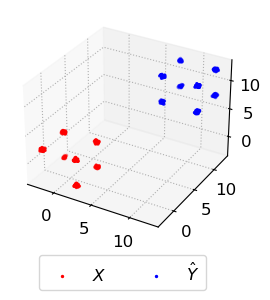

In [81]:
# %matplotlib widget
torch.manual_seed(1)
torch.manual_seed(1)
d = 3
n = 256
Z = torch.rand([n, d], dtype=torch.double) - 0.5
sign_z = torch.sign(Z)
sigma_z = torch.all((sign_z == -1), dim=1)
X = Z[~sigma_z]
X = X + 2*torch.sign(X)

# Y = X + 5
Z1 = torch.rand([n, d], dtype=torch.double) - 0.5
Y = Z1 + 2*torch.sign(Z1) + 10
Y = Y

fig = plt.figure(figsize=(3,3.5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
labels = ["$X$", "$\hat{Y}$"]
ax.scatter(X.T[0], X.T[1], X.T[2], s = 8, marker='.', facecolor='r', edgecolors='r', label="X")
ax.scatter(Y.T[0], Y.T[1], Y.T[2], s = 8, marker='.',facecolor='b', edgecolors='b', label="Y")
ax.tick_params(axis='both', which='major', labelsize=12, pad = 0.1)
ax.grid(color='w', linestyle='.', linewidth=2)
ax.grid("off")
# ax.yaxis._axinfo["grid"]['linewidth'] = 1
ax.xaxis._axinfo["grid"]['linestyle'] = ":"
ax.yaxis._axinfo["grid"]['linestyle'] = ":"
ax.zaxis._axinfo["grid"]['linestyle'] = ":"
# ax.legend()
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure, loc = 'lower center',  bbox_to_anchor=(0.5, 0.001), fontsize=12)
plt.savefig('fragemented Hypercube-d=3.png', dpi = 500, bbox_inches = 'tight', format='png')
plt.savefig('fragemented Hypercube-d=3.pdf', dpi = 500, bbox_inches = 'tight', format='pdf')
plt.savefig('fragemented Hypercube-d=3.svg', dpi = 500, bbox_inches = 'tight', format='svg')

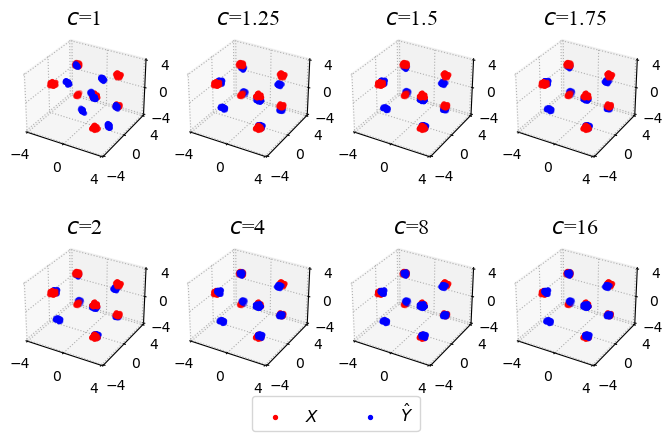

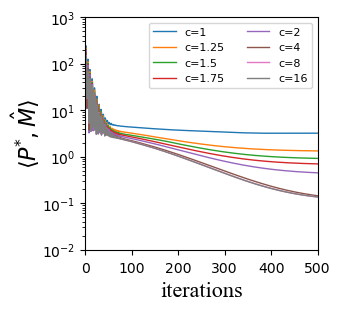

In [82]:
# %matplotlib widget
fig = plt.figure(figsize = (8.1, 4.8))
fig.subplots_adjust(hspace = .3, wspace=.2)
# ax = fig.add_subplot(241, projection='3d')

# Xv = (X.detach().cpu().numpy()).T
# Yv = Y_transfomed = Affine(Y,w,b).detach().cpu().numpy().T
batch_size = 256

plt.rcParams['xtick.major.pad']='5'
csfont = {'fontname': 'Times New Roman', 'size': 16}

cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]

fig1, axs1 = plt.subplots(1, 1, figsize=(3, 3.4))
labels = ["$X$", "$\hat{Y}$"]
for n,c in enumerate(cs):
    torch.manual_seed(1)
    path = name_core + "d=" + str(d) + "c=" + str(c)+".pth"
    checkpoint = torch.load(path)
    AM = AffineNet(d).double()
    AM_infer = checkpoint['AM_infer']
    AM.load_state_dict(AM_infer)
    AM.eval()
    Y_hat = AM(Y.double()).detach().cpu()

    Z1 = torch.rand([batch_size, d]) - 0.5
    Y = Z1 + 2*torch.sign(Z1) + 10

    ax = fig.add_subplot(2,4, n+1, projection='3d')
    
    Xv = X.T
    Yv = Y_hat.T
    ax.scatter(Xv[0], Xv[1], Xv[2], s = 8, marker='o', facecolors='r', edgecolors='r', label="X")
    ax.scatter(Yv[0], Yv[1], Yv[2], s= 8, marker='o', facecolors='b', edgecolors='b', label = "$\hat{Y}$")
    ax.set_title("$c$="+str(c), pad=-20, **csfont)
    ax.set_xticks([-4,0,4])
    ax.set_yticks([-4,0,4])
    ax.set_zticks([-4,0,4])
    ax.tick_params(axis="x", pad = 0)
    ax.tick_params(axis="y", pad = 0)
    ax.tick_params(axis="z", pad = 0)
    ax.xaxis._axinfo["grid"]['linestyle'] = ":"
    ax.yaxis._axinfo["grid"]['linestyle'] = ":"
    ax.zaxis._axinfo["grid"]['linestyle'] = ":"
    
    axs1.semilogy(checkpoint["costs"], '-', linewidth=1, label="c="+str(c))
    axs1.set_box_aspect(1)
    axs1.tick_params(axis='both', which='major', labelsize=10)
    axs1.set_xlim([0,500])
    axs1.set_yticks([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], **csfont)
    
    axs1.set_xlabel("iterations", **csfont)
    axs1.set_ylabel("$\langle  \mathbf{\mathit{P}}^{*}, \hat{M}  \\rangle$", **csfont, labelpad=0.01)
    
axs1.legend(fontsize=8, ncol=2) 
# fig.suptitle('Subset Selection') # or plt.suptitle('Main title')
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure, loc = 'lower center',  bbox_to_anchor=(0.52, 0), fontsize=12)


fig.savefig('fragemented Hypercube-SS-d=3.png', bbox_inches = 'tight', dpi = 500, format='png')
fig.savefig('fragemented Hypercube-SS-d=3.pdf', bbox_inches = 'tight', dpi = 500, format='pdf')
fig.savefig('fragemented Hypercube-SS-d=3.svg', bbox_inches = 'tight', dpi=500, format='svg')

fig1.savefig('fragemented Hypercube-SS-d=3-loss.png', bbox_inches = 'tight', dpi=500, format='png')
fig1.savefig('fragemented Hypercube-SS-d=3-loss.pdf', bbox_inches = 'tight', dpi=500, format='pdf')
fig1.savefig('fragemented Hypercube-SS-d=3-loss.svg', bbox_inches = 'tight', dpi=500, format='svg')

In [83]:
d = 3
name_core = "\\SS-ipot\\Results\\d={0}\\".format(d)

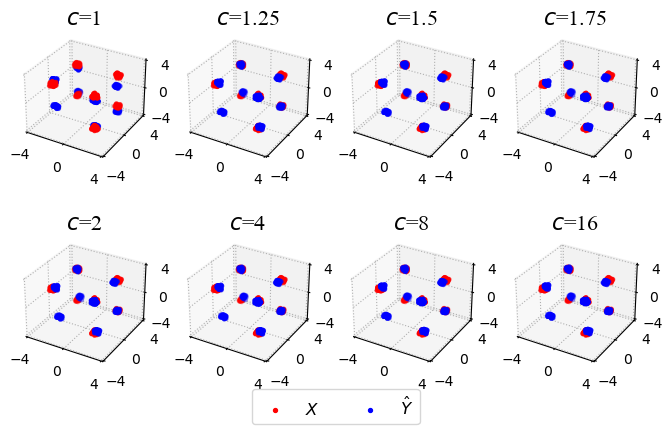

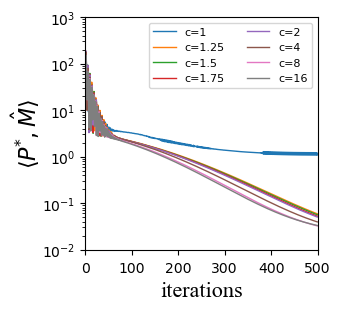

In [84]:
# %matplotlib widget
fig = plt.figure(figsize = (8.1, 4.7))
fig.subplots_adjust(hspace = .3, wspace=.2)
# ax = fig.add_subplot(241, projection='3d')

# Xv = (X.detach().cpu().numpy()).T
# Yv = Y_transfomed = Affine(Y,w,b).detach().cpu().numpy().T
batch_size = 256

plt.rcParams['xtick.major.pad']='5'
csfont = {'fontname': 'Times New Roman', 'size': 16}

cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]

fig1, axs1 = plt.subplots(1, 1, figsize=(3, 3.4))
labels = ["$X$", "$\hat{Y}$"]
for n,c in enumerate(cs):
    torch.manual_seed(1)
    path = name_core + "d=" + str(d) + "c=" + str(c)+".pth"
    checkpoint = torch.load(path)
    AM = AffineNet(d).double()
    AM_infer = checkpoint['AM_infer']
    AM.load_state_dict(AM_infer)
    AM.eval()
    Y_hat = AM(Y.double()).detach().cpu()

    Z1 = torch.rand([batch_size, d]) - 0.5
    Y = Z1 + 2*torch.sign(Z1) + 10

    ax = fig.add_subplot(2,4, n+1, projection='3d')
    
    Xv = X.T
    Yv = Y_hat.T
    ax.scatter(Xv[0], Xv[1], Xv[2], s = 8, marker='o', facecolors='r', edgecolors='r', label="X")
    ax.scatter(Yv[0], Yv[1], Yv[2], s= 8, marker='o', facecolors='b', edgecolors='b', label = "$\hat{Y}$")
    ax.set_title("$c$="+str(c), pad=-20, **csfont)
    ax.set_xticks([-4,0,4])
    ax.set_yticks([-4,0,4])
    ax.set_zticks([-4,0,4])
    ax.tick_params(axis="x", pad = 0)
    ax.tick_params(axis="y", pad = 0)
    ax.tick_params(axis="z", pad = 0)
    ax.xaxis._axinfo["grid"]['linestyle'] = ":"
    ax.yaxis._axinfo["grid"]['linestyle'] = ":"
    ax.zaxis._axinfo["grid"]['linestyle'] = ":"
    
    axs1.semilogy(checkpoint["costs"], '-', linewidth=1, label="c="+str(c))
    axs1.set_box_aspect(1)
    axs1.tick_params(axis='both', which='major', labelsize=10)
    axs1.set_xlim([0,500])
    axs1.set_yticks([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], **csfont)
    
    axs1.set_xlabel("iterations", **csfont)
    axs1.set_ylabel("$\langle  \mathbf{\mathit{P}}^{*}, \hat{M}  \\rangle$", **csfont, labelpad=0.01)
    
axs1.legend(fontsize=8, ncol=2) 
# fig.suptitle('Subset Selection') # or plt.suptitle('Main title')
fig.legend(labels, ncol=2, bbox_transform=fig.transFigure, loc = 'lower center',  bbox_to_anchor=(0.52, 0), fontsize=12)


fig.savefig('fragemented Hypercube-SS-ipot-d=3.png', bbox_inches = 'tight', dpi = 500, format='png')
fig.savefig('fragemented Hypercube-SS-ipot-d=3.pdf', bbox_inches = 'tight', dpi = 500, format='pdf')
fig.savefig('fragemented Hypercube-SS-ipot-d=3.svg', bbox_inches = 'tight', dpi=500, format='svg')

fig1.savefig('fragemented Hypercube-SS-ipot-d=3-loss.png', bbox_inches = 'tight', dpi=500, format='png')
fig1.savefig('fragemented Hypercube-SS-ipot-d=3-loss.pdf',bbox_inches = 'tight', dpi=500, format='pdf')
fig1.savefig('fragemented Hypercube-SS-ipot-d=3-loss.svg', bbox_inches = 'tight', dpi=500, format='svg')